# Import Libraries

In [1]:
import os
import plotly.express as px
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Data Preprocessing

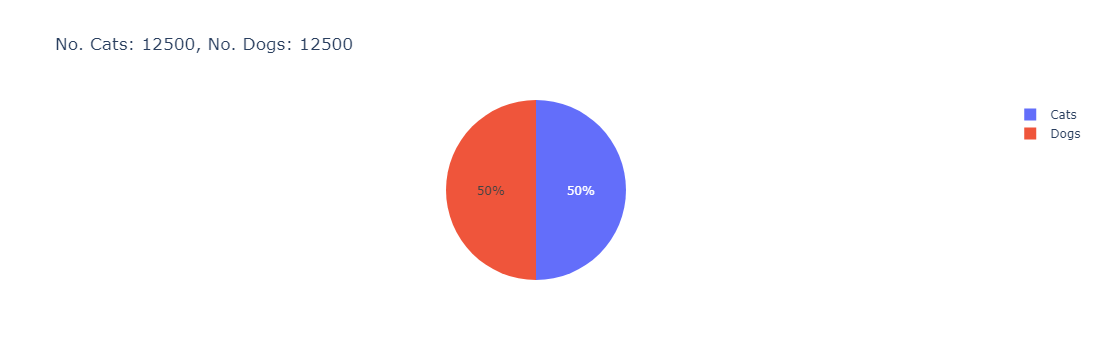

In [2]:
class_names = ['Cats', 'Dogs']

num_cats = len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\PetImages\Cat'))
num_dogs = len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\PetImages\Dog'))
num_images = [num_cats, num_dogs]

px.pie(names = class_names, values = num_images, title = f'No. Cats: {num_cats}, No. Dogs: {num_dogs}')

# Create Directories (Files) for Training, Validation & Testing

In [3]:
try:
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs')
    
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training')
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation')
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing')
    
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Cats')
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Dogs')
    
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Cats')
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Dogs')
    
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Cats')
    os.mkdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Dogs')
except OSError:
    print('!!Error!!, Failed to make directory')

# Define Data Path

In [4]:
Cat_DIR = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\PetImages\Cat'
Dog_DIR = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\PetImages\Dog'

Training_DIR = 'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training'
Validation_DIR = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation'

Training_Cats = os.path.join(Training_DIR, 'Cats')
Validation_Cats = os.path.join(Validation_DIR, 'Cats')

Training_Dogs = os.path.join(Training_DIR, 'Dogs')
Validation_Dogs = os.path.join(Validation_DIR, 'Dogs')

In [5]:
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Dogs')))

print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Dogs')))

print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Dogs')))

0
0
0
0
0
0


# Data Augmentation

In [6]:
def split_data(Main_DIR, Training_DIR, Validation_DIR, Test_DIR = None, include_test_split = True, Split_Size = 0.9):

    files = []
    for file in os.listdir(Main_DIR):
        if os.path.getsize(os.path.join(Main_DIR, file)):
            files.append(file)

    Shuffled_Files = random.sample(files, len(files))
    Split = int(0.9 * len(Shuffled_Files))
    Train = Shuffled_Files[ : Split] # Training Split
    Split_Validation_Test = int(Split + (len(Shuffled_Files) - Split) / 2)

    if include_test_split:
        Validation = Shuffled_Files[Split : Split_Validation_Test] # Validation Split
        Test = Shuffled_Files[Split_Validation_Test : ] # Test Split
    else:
        Validation = Shuffled_Files[Split : ]

    for element in Train:
        copyfile(os.path.join(Main_DIR, element), os.path.join(Training_DIR, element))

    for element in Validation:
        copyfile(os.path.join(Main_DIR, element), os.path.join(Validation_DIR, element))

    if include_test_split:
        for element in Test:
            copyfile(os.path.join(Main_DIR, element), os.path.join(Test_DIR, element))

    print('Split Successful')

In [7]:
training_cats = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Cats'
training_dogs = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Dogs'

validation_cats = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Cats'
validation_dogs = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Dogs'

testing_cats = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Cats'
testing_dogs = r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Dogs'

In [8]:
split_data(Cat_DIR, training_cats, validation_cats, testing_cats, include_test_split = True, Split_Size = 0.9)

split_data(Dog_DIR, training_dogs, validation_dogs, testing_dogs, include_test_split = True, Split_Size = 0.9)

Split Successful
Split Successful


In [9]:
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training\Dogs')))

print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation\Dogs')))

print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Cats')))
print(len(os.listdir(r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing\Dogs')))

11249
11249
625
625
625
625


# Data Generator

In [10]:
Train_GEN = ImageDataGenerator(rescale = 1 / 255)

Validation_GEN = ImageDataGenerator(rescale = 1 / 255)

if True:
    Test_GEN = ImageDataGenerator(rescale = 1 / 255)

In [11]:
Train_Generator = Train_GEN.flow_from_directory(
    r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Training',
    target_size = (150, 150), batch_size = 64, class_mode = 'binary')

Validation_Generator = Validation_GEN.flow_from_directory(
    r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Validation',
    target_size = (150, 150), batch_size = 64, class_mode = 'binary')

if True:
    Test_Generator = Test_GEN.flow_from_directory(
        r'D:\Abdulrhman Osama\Deep Learning Projects\Cats & Dogs Classification (NN)\Cats Vs. Dogs\Testing',
        target_size = (150, 150), batch_size = 64, class_mode = 'binary')

Found 22498 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.
Found 1250 images belonging to 2 classes.


# Checking

In [12]:
class_names = ['Cat', 'Dog']

def plot_data(generator, num_images):
    
    i = 1
    images, labels = next(generator)
    labels = labels.astype('int32')
    
    plt.figure(figsize = (14, 15))
    for image, label in zip(images, labels):
        
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == num_images + 1:
            break
    plt.show()

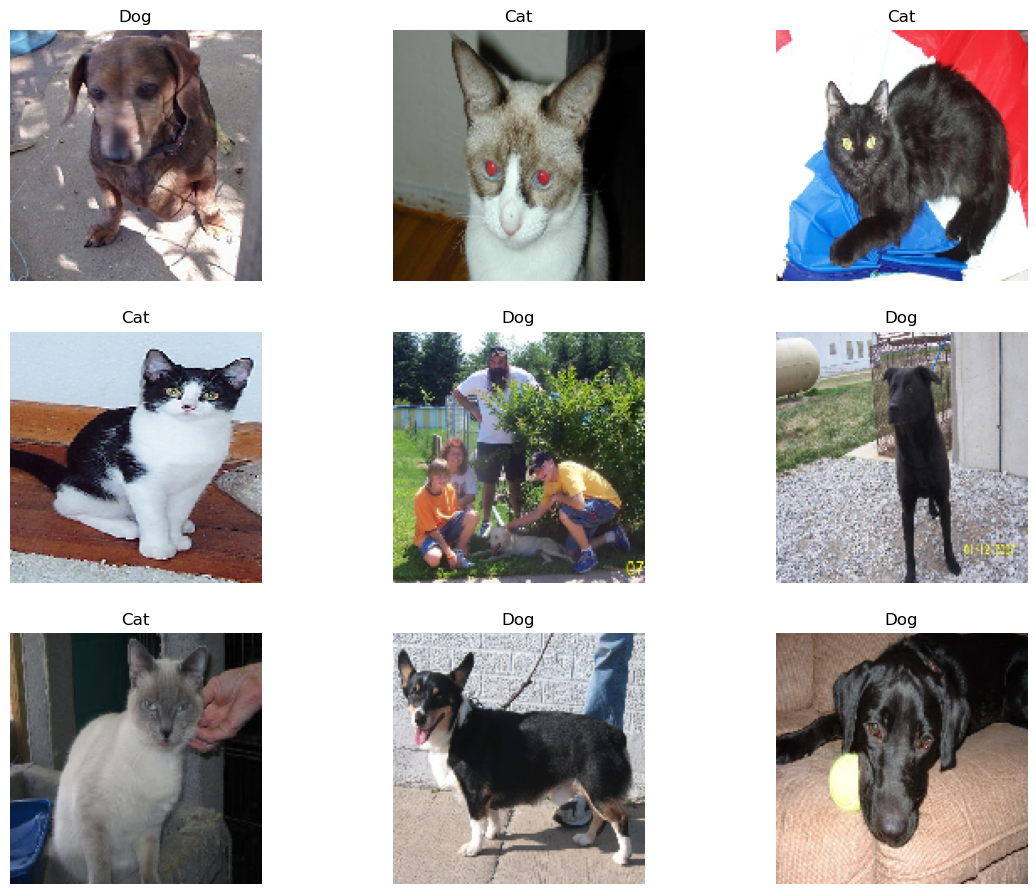

In [13]:
plot_data(Train_Generator, 9)

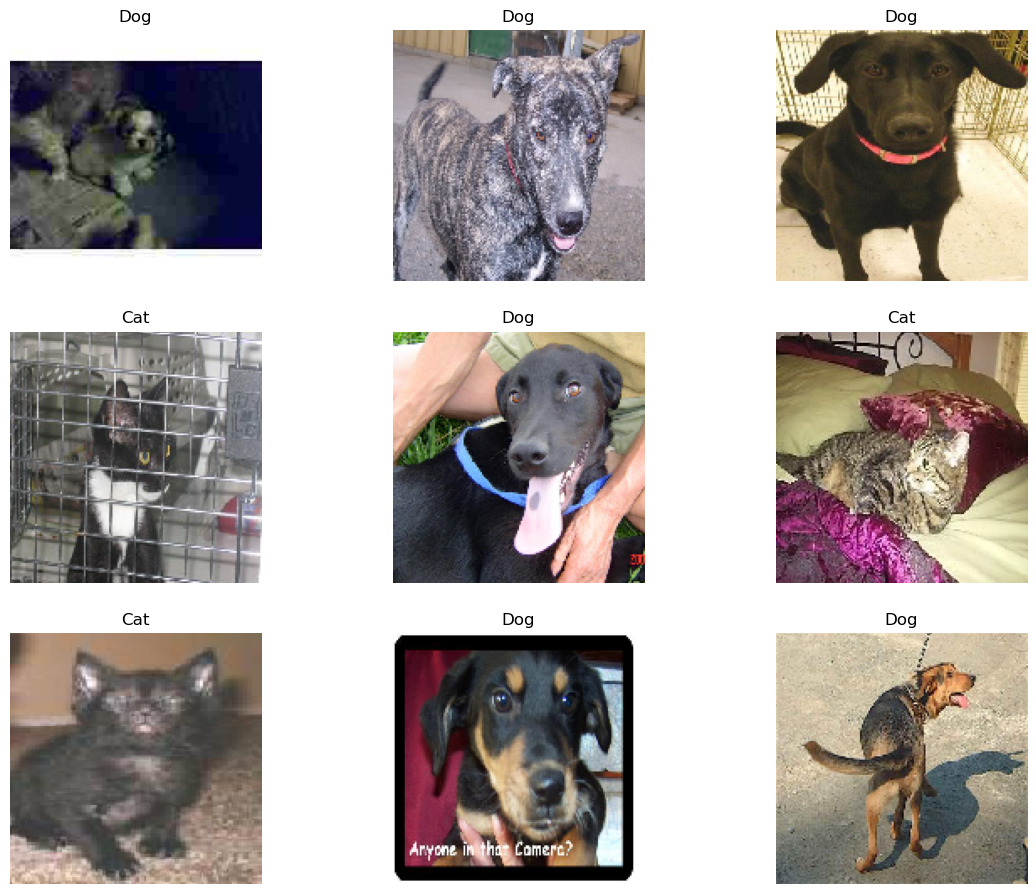

In [14]:
plot_data(Validation_Generator, 9)

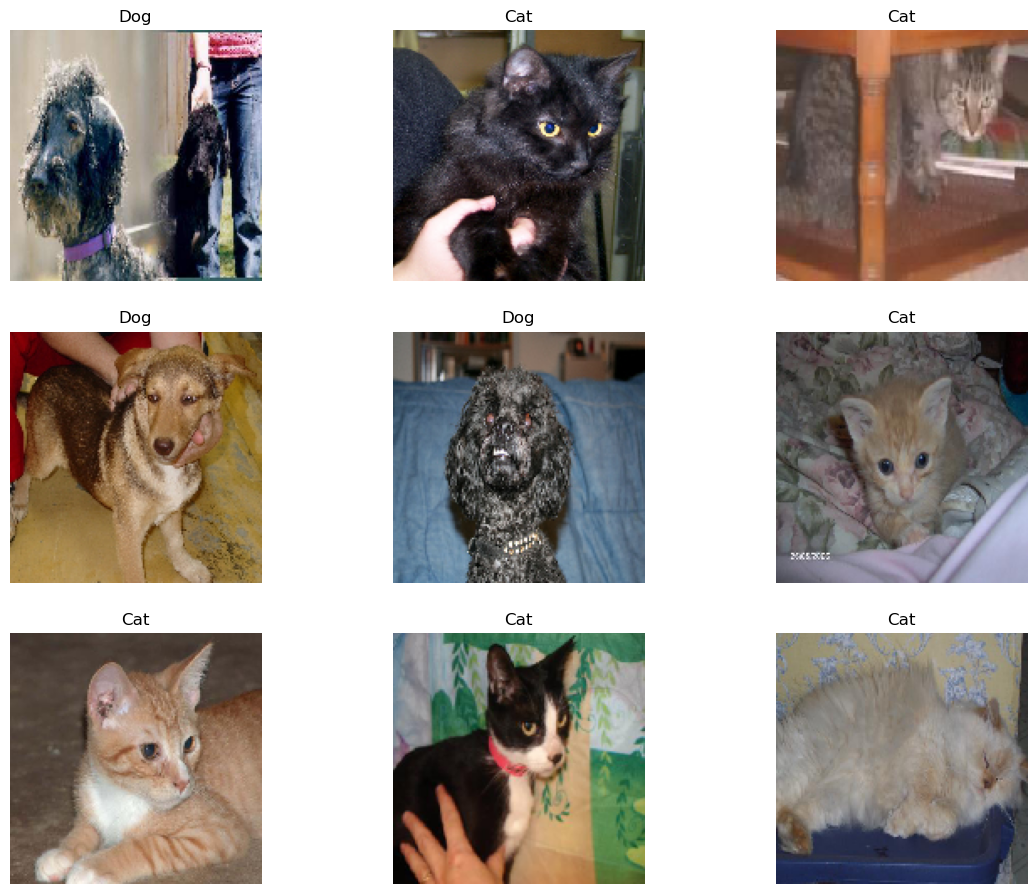

In [15]:
if True:
    plot_data(Test_Generator, 9)

# CNN Model

In [16]:
inputs = tf.keras.layers.Input(shape = (150, 150, 3))

X = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(inputs)
X = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(X)
X = tf.keras.layers.MaxPooling2D(2, 2)(X)

X = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.MaxPooling2D(2, 2)(X)

X = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.MaxPooling2D(2, 2)(X)

X = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.MaxPooling2D(2, 2)(X)

X = tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu')(X)
X = tf.keras.layers.GlobalAveragePooling2D()(X)

X = Dense(1024, activation = 'relu')(X)
X = tf.keras.layers.Dense(2, activation = 'softmax')(X)

CNN_Model = Model(inputs = inputs, outputs = X)

In [17]:
CNN_Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 31, 31, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,239,586 (19.99 MB)

 Trainable params: 5,239,586 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
CNN_Model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
                 loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
R = CNN_Model.fit(Train_Generator, epochs = 10, validation_data = Validation_Generator)

Epoch 1/10


D:\Abdulrhman Osama\Anaconda Navigator\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



 64/352 ━━━━━━━━━━━━━━━━━━━━ 6:08 1s/step - accuracy: 0.4953 - loss: 0.6929

D:\Abdulrhman Osama\Anaconda Navigator\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning:

Truncated File Read



352/352 ━━━━━━━━━━━━━━━━━━━━ 464s 1s/step - accuracy: 0.5187 - loss: 0.6888 - val_accuracy: 0.6424 - val_loss: 0.6467
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.6280 - loss: 0.6399 - val_accuracy: 0.6544 - val_loss: 0.6145
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.6797 - loss: 0.5982 - val_accuracy: 0.7112 - val_loss: 0.5537
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.7111 - loss: 0.5634 - val_accuracy: 0.7392 - val_loss: 0.5262
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.7321 - loss: 0.5334 - val_accuracy: 0.7568 - val_loss: 0.5126
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.7431 - loss: 0.5245 - val_accuracy: 0.7584 - val_loss: 0.4945
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.7519 - loss: 0.5053 - val_accuracy: 0.7712 - val_loss: 0.4806
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 461s 1s/step - accuracy: 0.7670 - loss: 0.4912 - val_accuracy: 0.720

# Evaluation

In [20]:
if True:
    CNN_Model.evaluate(Test_Generator)

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.7873 - loss: 0.4496


# Thank You

# Eng. Abdulrhman Osama